In [239]:
import pandas
import numpy
import geopandas
import rasterio
import xarray
import rioxarray
import matplotlib.pyplot as plt
import seaborn
import os

## Read Files

In [2]:
regionsfilepath = "/home/jesse-ubuntu/Documents/DrainageDitches/WBDHU10_MN.shp"
regions = geopandas.read_file(regionsfilepath)

In [3]:
regions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tnmid       536 non-null    object  
 1   metasource  194 non-null    object  
 2   sourcedata  26 non-null     object  
 3   sourceorig  28 non-null     object  
 4   sourcefeat  0 non-null      object  
 5   loaddate    536 non-null    object  
 6   referenceg  0 non-null      object  
 7   areaacres   536 non-null    float64 
 8   areasqkm    536 non-null    float64 
 9   states      536 non-null    object  
 10  huc10       536 non-null    object  
 11  name        536 non-null    object  
 12  hutype      536 non-null    object  
 13  humod       72 non-null     object  
 14  globalid    536 non-null    object  
 15  shape_Leng  536 non-null    float64 
 16  shape_Area  536 non-null    float64 
 17  geometry    536 non-null    geometry
dtypes: float64(4), geometry(1), object(13)
mem

In [4]:
regions.head()

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,huc10,name,hutype,humod,globalid,shape_Leng,shape_Area,geometry
0,{C2A0F05B-49D2-46C1-BE9A-35001D63E3DE},None,None,None,None,2012-10-24,None,85857.35,347.45,MN,0701010201,Steamboat River,S,None,{1FA708E3-E29C-11E2-8094-0021280458E6},1.369870,0.041329,"POLYGON ((-94.84156 47.43560, -94.84038 47.435..."
1,{3321F107-32C8-48A5-9950-FC9385A6C379},None,None,None,None,2012-10-24,None,77262.31,312.67,MN,0701010202,Kabekona River,S,None,{1FA71FA8-E29C-11E2-8094-0021280458E6},1.301139,0.037107,"POLYGON ((-94.92561 47.30064, -94.92420 47.300..."
2,{8C6291D1-346F-434F-8F81-2058BBBC673F},None,None,None,None,2012-10-24,None,104372.35,422.38,MN,0701010203,Woman Lake,S,None,{1FA73E30-E29C-11E2-8094-0021280458E6},1.719874,0.049913,"POLYGON ((-94.54178 47.03385, -94.54133 47.033..."
3,{5D2068DF-007F-4FDC-B2DD-E9F53693A401},None,None,None,None,2012-10-24,None,332839.78,1346.96,MN,0701010205,Leech Lake,S,None,{1FA75568-E29C-11E2-8094-0021280458E6},2.977380,0.159809,"POLYGON ((-94.47566 47.41443, -94.47346 47.414..."
4,{27EE3F20-B16B-4A43-A602-22BDBAD1990F},{9BE7FCD9-1EEC-4F5D-8B04-88AB1584AD6B},None,None,None,2017-04-07,None,169764.16,687.01,MN,0903000903,Warroad River,S,NM,{E67FDC22-7F73-44FE-B326-AA66752FC57D},2.093619,0.083974,"POLYGON ((-95.33270 48.93111, -95.33180 48.929..."


<Axes: >

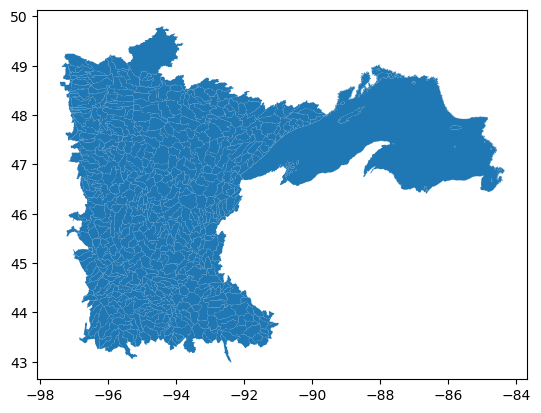

In [5]:
regions.plot()

In [6]:
regions.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [23]:
demfilepath = '/home/jesse-ubuntu/Documents/DrainageDitches/N44W094.hgt'
dem = rioxarray.open_rasterio(demfilepath)

In [24]:
dem

<xarray.DataArray (band: 1, y: 3601, x: 3601)>
[12967201 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -94.0 -94.0 -94.0 -94.0 ... -93.0 -93.0 -93.0 -93.0
  * y            (y) float64 45.0 45.0 45.0 45.0 45.0 ... 44.0 44.0 44.0 44.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [26]:
dem = rioxarray.open_rasterio(demfilepath).squeeze() ##squeeze used when there is only one band. otherwise to access a specific band of dem you can do dem[0]
dem

<xarray.DataArray (y: 3601, x: 3601)>
[12967201 values with dtype=int16]
Coordinates:
    band         int64 1
  * x            (x) float64 -94.0 -94.0 -94.0 -94.0 ... -93.0 -93.0 -93.0 -93.0
  * y            (y) float64 45.0 45.0 45.0 45.0 45.0 ... 44.0 44.0 44.0 44.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [30]:
dem.rio.crs

CRS.from_epsg(4326)

## Reproject to common CRS

In [31]:
regions=regions.to_crs(4326)

In [32]:
regions.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

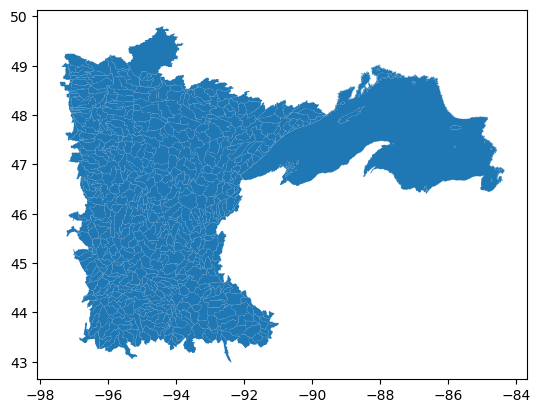

In [33]:
regions.plot()

In [34]:
##if the raster needed to be reprojected as well
## dem = dem.rio.reproject(4326)

## Plotting

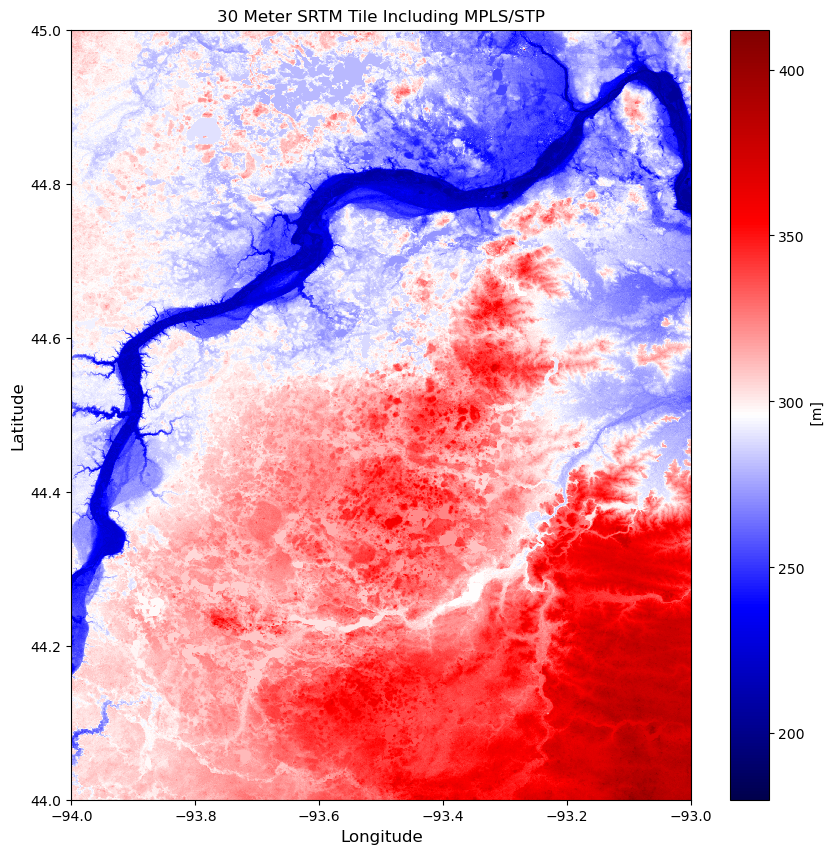

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
dem.plot.imshow(ax=ax, cmap='seismic')
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.title('30 Meter SRTM Tile Including MPLS/STP')
plt.show()

## Overlaying raster and shapefile

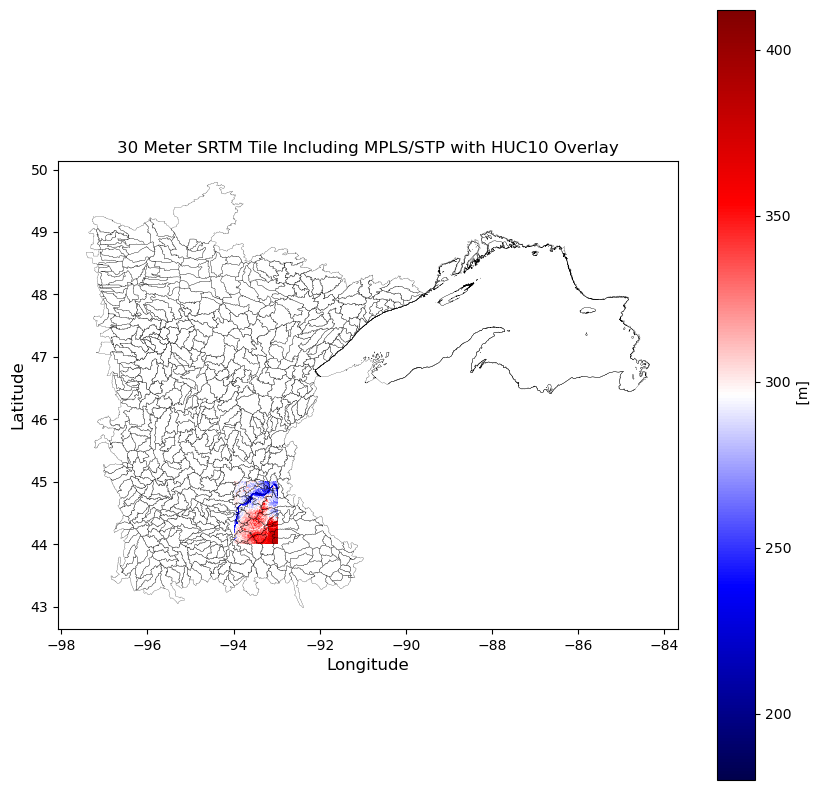

In [198]:
fig, ax = plt.subplots(figsize=(10,10))
dem.plot.imshow(ax=ax, cmap='seismic')
regions.plot(ax=ax, facecolor='none', edgecolor='black', lw=0.15)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.title('30 Meter SRTM Tile Including MPLS/STP with HUC10 Overlay')
plt.show()

## Clip shapefile to raster size

In [49]:
dem

<xarray.DataArray (y: 3601, x: 3601)>
array([[306, 305, 305, ..., 308, 308, 308],
       [307, 307, 307, ..., 307, 307, 308],
       [308, 308, 308, ..., 307, 307, 308],
       ...,
       [304, 305, 306, ..., 389, 389, 389],
       [304, 305, 305, ..., 389, 390, 389],
       [305, 305, 305, ..., 389, 389, 388]], dtype=int16)
Coordinates:
    band         int64 1
  * x            (x) float64 -94.0 -94.0 -94.0 -94.0 ... -93.0 -93.0 -93.0 -93.0
  * y            (y) float64 45.0 45.0 45.0 45.0 45.0 ... 44.0 44.0 44.0 44.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [56]:
regions_ss = geopandas.clip(regions, (-94.0, 44.0, -93.0, 45.0), False)

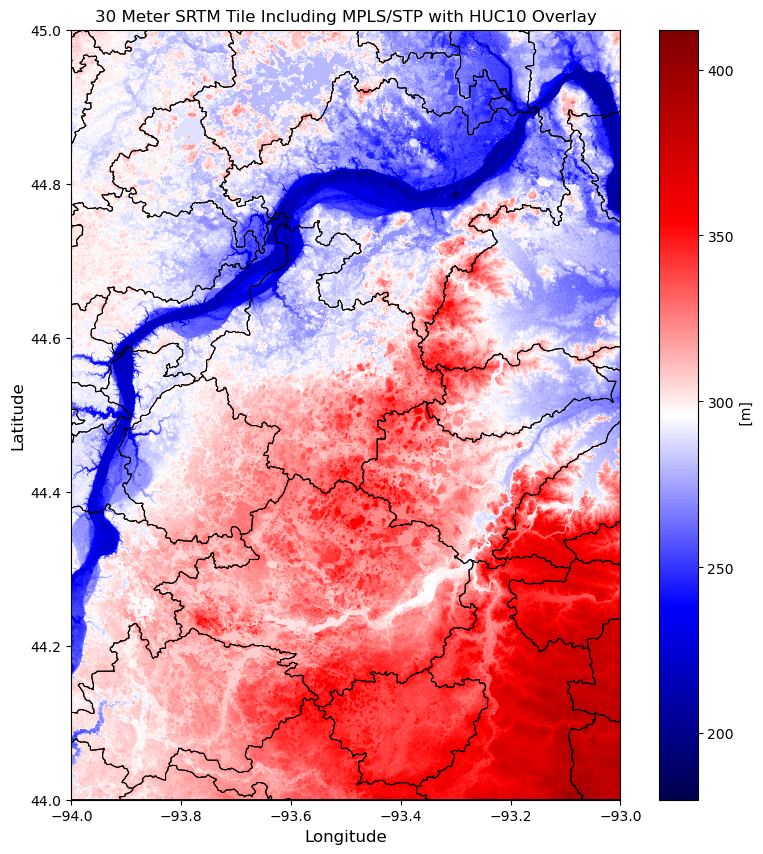

In [66]:
fig, ax = plt.subplots(figsize=(10,10))
dem.plot.imshow(ax=ax, cmap='seismic')
regions_ss.plot(ax=ax, facecolor='none', edgecolor='black', lw=0.75)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.title('30 Meter SRTM Tile Including MPLS/STP with HUC10 Overlay')
plt.show()

In [59]:
regions_ss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 37 entries, 163 to 22
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tnmid       37 non-null     object  
 1   metasource  7 non-null      object  
 2   sourcedata  4 non-null      object  
 3   sourceorig  4 non-null      object  
 4   sourcefeat  0 non-null      object  
 5   loaddate    37 non-null     object  
 6   referenceg  0 non-null      object  
 7   areaacres   37 non-null     float64 
 8   areasqkm    37 non-null     float64 
 9   states      37 non-null     object  
 10  huc10       37 non-null     object  
 11  name        37 non-null     object  
 12  hutype      37 non-null     object  
 13  humod       0 non-null      object  
 14  globalid    37 non-null     object  
 15  shape_Leng  37 non-null     float64 
 16  shape_Area  37 non-null     float64 
 17  geometry    37 non-null     geometry
dtypes: float64(4), geometry(1), object(13)
memory u

In [74]:
#A way to selecting features by coordinates. not what we want right now though. Plot it if you would like to see!
##regions_ss_test = regions.cx[-94.0:-93, 44.0:45.0]

**Call one region onto the map**

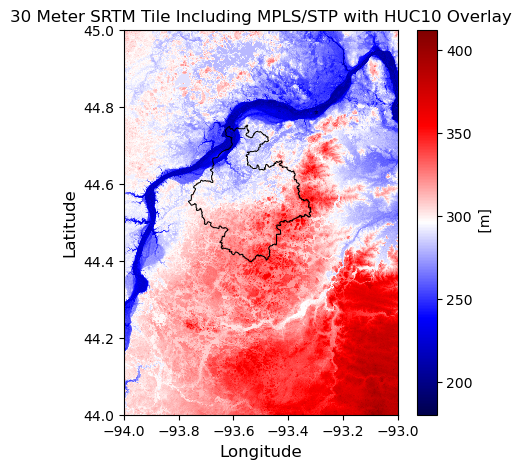

In [323]:
##Attempting to pull just one region onto the map
regions_ss1 = regions_ss.iloc[[26]]
fig, ax = plt.subplots(figsize=(5,5))
dem.plot.imshow(ax=ax, cmap='seismic')
regions_ss1.plot(ax=ax, facecolor='none', edgecolor='black', lw=0.75)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.title('30 Meter SRTM Tile Including MPLS/STP with HUC10 Overlay')
plt.show()

## Clip raster to the single region

In [228]:
dem_clip = dem.rio.clip(regions_ss1.geometry.values, regions_ss1.crs, drop=True, invert=False)
nodata = dem_clip.rio.nodata
dem_clip = dem_clip.where(dem_clip != nodata)

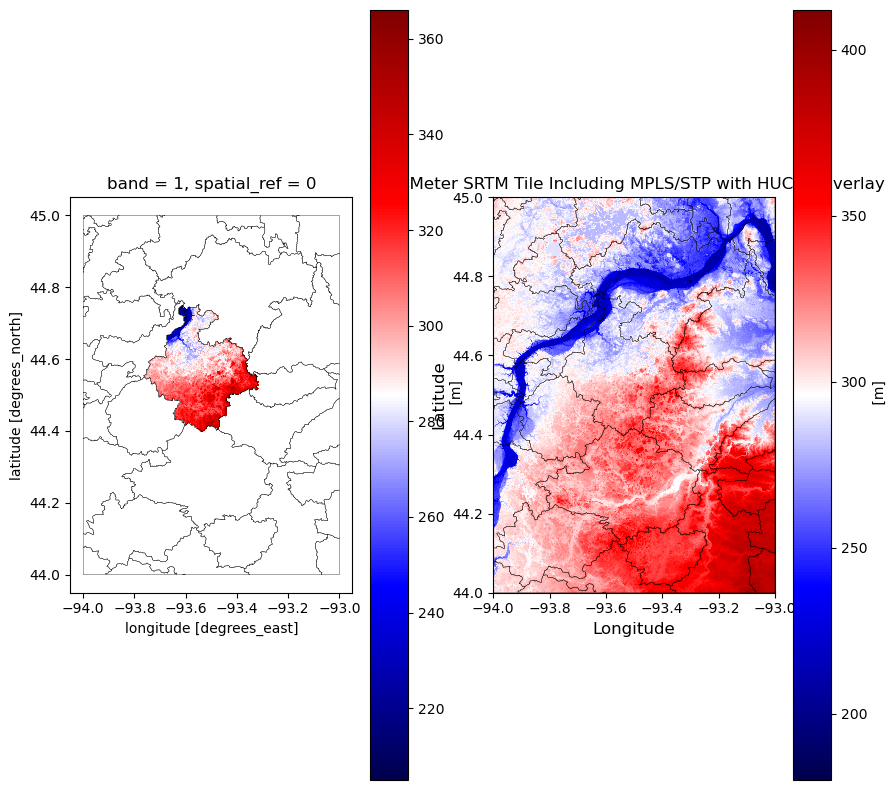

In [238]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
dem.plot.imshow(ax=ax2, cmap='seismic')
dem_clip.plot.imshow(ax=ax1,cmap='seismic')##, vmin=0, vmax=450)
regions_ss.plot(ax=ax1, facecolor='none', edgecolor='black', lw=0.25)
regions_ss.plot(ax=ax2, facecolor='none', edgecolor='black', lw=0.25)
##regions.plot(ax=ax1, facecolor='none', edgecolor='black', lw=0.25)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.title('30 Meter SRTM Tile Including MPLS/STP with HUC10 Overlay')
##plt.clim(vmin=0,vmax=600)
plt.show()

In [240]:
ls

HUC.ipynb                              WBDHU10_MN.sbn
Lab01_Tutorial.ipynb                   WBDHU10_MN.sbx
N44W094.hgt                            WBDHU10_MN.shp
N44W094.SRTMGL1.hgt.zip                WBDHU10_MN.shp.xml
NHDPlus_H_National_Release_1_GDB.gdb/  WBDHU10_MN.shx
NHDPlus_H_National_Release_1_GDB.jpg   WBDHU10_MN.zip
NHDPlus_H_National_Release_1_GDB.xml   WBD_National_GDB.gdb/
NHDPlus_H_National_Release_1_GDB.zip   WBD_National_GDB.jpg
WBDHU10_MN.cpg                         WBD_National_GDB.xml
WBDHU10_MN.dbf                         WBD_National_GDB.zip
WBDHU10_MN.prj


In [242]:
dem_clip.rio.to_raster(r"/home/jesse-ubuntu/Documents/DrainageDitches/dem_clip.tif")

## I think the above successfully completes the individual step to break out a piece of the raster. Now to make it loop for each row of the geodataframe

In [259]:
for index in regions_ss.index:
    print(regions_ss['name'][index]+'_'+regions_ss['huc10'][index]+'_'+str(index))



Cobb River_0702001103_163
Little Cobb River_0702001102_394
Upper Le Sueur River_0702001101_165
Straight River_0704000203_419
Crane Creek_0704000202_416
Upper Cannon River_0704000201_418
Lower Le Sueur River_0702001106_397
City of Mankato-Minnesota River_0702000711_161
South Branch Rush River_0702001203_400
City of Le Sueur-Minnesota River_0702001205_402
Middle Branch Rush River_0702001204_401
High Island Creek_0702001206_403
Bevens Creek_0702001207_404
Buffalo Creek_0701020506_495
City of Lester Prairie-South Fork Crow River_0701020503_496
South Fork Crow River_0701020507_497
North Fork Crow River_0701020406_106
South Branch Middle Fork Zumbro River_0704000402_436
Middle Fork Zumbro River_0704000403_437
North Fork Zumbro River_0704000404_438
Little Cannon River_0704000207_430
Lower Cannon River_0704000209_432
Prairie Creek_0704000205_428
Middle Cannon River_0704000206_429
Le Sueur Creek_0702001201_398
Chub Creek_0704000204_420
Sand Creek_0702001208_405
City of Belle Plain-Minnesota Riv

In [321]:
regions_ss.iloc[[0]].geometry.values


<GeometryArray>
[<POLYGON ((-94 44, -94 44.075, -93.999 44.075, -93.999 44.075, -93.998 44.07...>]
Length: 1, dtype: geometry

In [314]:
regions_ss.head()

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,huc10,name,hutype,humod,globalid,shape_Leng,shape_Area,geometry
163,{6F0BEC85-C2A2-475C-8145-9497DAECE9BE},None,None,None,None,2012-10-24,None,114818.77,464.66,MN,0702001103,Cobb River,S,None,{212A8AF2-E29C-11E2-8094-0021280458E6},2.333970,0.052035,"POLYGON ((-94.00000 44.00000, -94.00000 44.075..."
394,{4D42F5C7-1C8F-46A6-9792-6B2B9825E7F0},None,None,None,None,2012-10-24,None,83620.54,338.40,MN,0702001102,Little Cobb River,S,None,{212A6A67-E29C-11E2-8094-0021280458E6},1.353151,0.037943,"MULTIPOLYGON (((-93.91188 44.00385, -93.90877 ..."
165,{7F9404B9-2622-4E2C-9BEC-50C004C551B9},{3570DFD3-BAAF-4B0D-AFC2-AE4DEFE3A01A},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2022-02-07,None,162775.67,658.73,MN,0702001101,Upper Le Sueur River,S,None,{212A51F4-E29C-11E2-8094-0021280458E6},2.184241,0.073846,"POLYGON ((-93.82197 44.04671, -93.82178 44.047..."
419,{A7A75AA2-4B8B-4EF3-95F4-DB74898A0686},{3570DFD3-BAAF-4B0D-AFC2-AE4DEFE3A01A},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2022-02-07,None,228186.69,923.44,MN,0704000203,Straight River,S,None,{21D7FC38-E29C-11E2-8094-0021280458E6},2.851487,0.103685,"POLYGON ((-93.37196 44.01697, -93.37120 44.017..."
416,{084F9829-90DC-4E1A-A566-B0BFAE2A6F68},None,None,None,None,2012-10-24,None,67442.54,272.93,MN,0704000202,Crane Creek,S,None,{21D7E586-E29C-11E2-8094-0021280458E6},1.092470,0.030675,"POLYGON ((-93.35299 44.16932, -93.35181 44.169..."


In [333]:
 for i in range(len(regions_ss)):
     print(regions_ss.iloc[[i]]['name']+'_'+regions_ss.iloc[[i]]['huc10'])

print('break')
print('')
name = 'testing'+regions_ss.iloc[[0]]['name']+'_'+regions_ss.iloc[[0]]['huc10']+'more testing'
print(name)
print('')
print(name)

163    Cobb River_0702001103
dtype: object
394    Little Cobb River_0702001102
dtype: object
165    Upper Le Sueur River_0702001101
dtype: object
419    Straight River_0704000203
dtype: object
416    Crane Creek_0704000202
dtype: object
418    Upper Cannon River_0704000201
dtype: object
397    Lower Le Sueur River_0702001106
dtype: object
161    City of Mankato-Minnesota River_0702000711
dtype: object
400    South Branch Rush River_0702001203
dtype: object
402    City of Le Sueur-Minnesota River_0702001205
dtype: object
401    Middle Branch Rush River_0702001204
dtype: object
403    High Island Creek_0702001206
dtype: object
404    Bevens Creek_0702001207
dtype: object
495    Buffalo Creek_0701020506
dtype: object
496    City of Lester Prairie-South Fork Crow River_0...
dtype: object
497    South Fork Crow River_0701020507
dtype: object
106    North Fork Crow River_0701020406
dtype: object
436    South Branch Middle Fork Zumbro River_0704000402
dtype: object
437    Middle Fork Zumbro R